In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#generate the sample
def gen_data():
    nobs = 1000
    #beta1 = 1
    #beta2 = 1
    #alpha = 1.5
    beta1 = 5
    beta2 = 3
    alpha = 6
    x = np.random.uniform(low=0, high=1., size=nobs)
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)# np.random.uniform(low=-1., high=1., size=nobs) # 
    y = alpha + beta1 * x + beta2*x**2  + e
    y = .001 + y*(y>=.0001) # ensure that we don't get negative ys...
    return y,x,nobs

In [3]:
yn,xn,nobs = gen_data()
model = sm.OLS((yn),sm.add_constant(xn))
model_fit = model.fit(disp=False)

In [4]:
def compute_loglike(resid):
    sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
    ll = np.log(stats.norm.pdf(resid,loc=0,scale=sigma))
    return ll

In [5]:
def compute_llr(yn,xn):
    
    model1 = sm.OLS(np.log(yn),sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    ll1 = compute_loglike(np.exp(model1_fit.resid))
    
    model2 = sm.OLS(yn,sm.add_constant(xn))
    model2_fit = model2.fit(disp=False)
    ll2 = compute_loglike(model2_fit.resid)
    
    llr = ll1.sum() - ll2.sum()
    omega2 = (ll1- ll2).var()
    return llr,np.sqrt(omega2)

yn,xn,nobs = gen_data()
print(compute_llr(yn,xn))

(27.778893883179308, 0.6630327946506925)


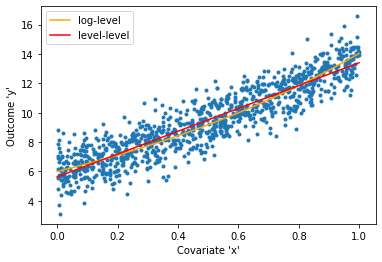

In [6]:
yn,xn, nobs = gen_data()
support = np.arange(0,1,1/nobs)

model1 = sm.OLS(np.log(yn),sm.add_constant(xn))
model1_fit = model1.fit(disp=False)
#print(model1_fit.summary())
model1_plt =  np.exp(model1_fit.params[0] + model1_fit.params[1]*support)

model2 = sm.OLS(yn,sm.add_constant(xn))
model2_fit = model2.fit(disp=False)
model2_plt = model2_fit.params[0] + model2_fit.params[1]*support 
#print(model2_fit.summary())

plt.scatter(xn,yn,marker=".")
plt.plot(support,model1_plt,label="log-level",color="orange")
plt.plot(support,model2_plt,label="level-level",color="red")
plt.legend()

plt.ylabel("Outcome 'y'")
plt.xlabel("Covariate 'x'")
#plt.ylim((0.,100.))
plt.savefig('../figs/loglevel_plot.png')
#plt.xlim((-.25,0.75))
#plt.savefig('figs/nonnested_zoom')
plt.show()

0.5221145771064293   0.5221145771064292
0.0012737348262916726 1.6224004077082773e-06   0.5221161995068369
-1432.8866522345907   -1.4328866522345907
-1434.1603870608824   -1.4341603870608823


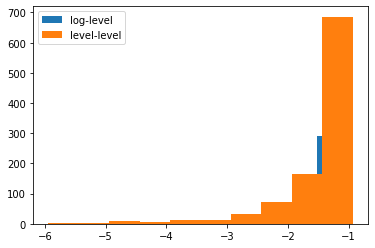

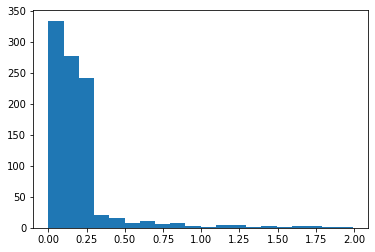

In [7]:
ll1 = compute_loglike(np.exp(model1_fit.resid))
ll2 = compute_loglike(model2_fit.resid)

llr = ll1.sum() - ll2.sum()
omega2s = (ll1- ll2)**2 - (ll1.mean() - ll2.mean())**2
omega2 = (ll1- ll2).var()

print(omega2," ",omega2s.mean(),)
print(ll1.mean() - ll2.mean(),(ll1.mean() - ll2.mean())**2, " ", ((ll1- ll2)**2).mean() )
print(ll1.sum()," ", ll1.mean())
print(ll2.sum()," ", ll2.mean())

plt.hist(compute_loglike(np.exp(model1_fit.resid)),label="log-level")
plt.hist(compute_loglike(model2_fit.resid),label="level-level")
plt.legend()
plt.show()

plt.hist(omega2s[omega2s <=2],bins=20)
plt.show()

0.42893312088061875   0.42893312088061897
2.132384291243046 4.547062765540108   4.975995886420727
698.2239041821638   0.6982239041821637
-1434.1603870608824   -1.4341603870608823


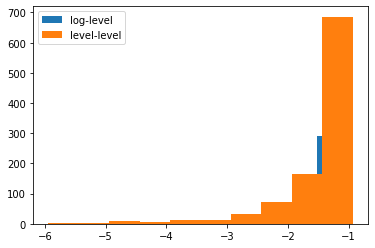

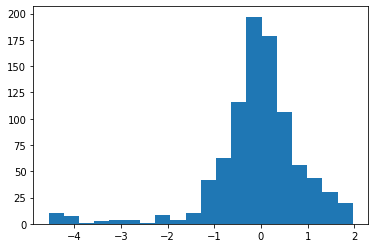

In [8]:
#why is omega square robust to mispecification???

ll1 = compute_loglike(model1_fit.resid)
ll2 = compute_loglike(model2_fit.resid)

llr = ll1.sum() - ll2.sum()
omega2s = (ll1- ll2)**2 - (ll1.mean() - ll2.mean())**2
omega2 = (ll1- ll2).var()

print(omega2," ",omega2s.mean(),)
print(ll1.mean() - ll2.mean(),(ll1.mean() - ll2.mean())**2, " ", ((ll1- ll2)**2).mean() )
print(ll1.sum()," ", ll1.mean())
print(ll2.sum()," ", ll2.mean())

plt.hist(compute_loglike(np.exp(model1_fit.resid)),label="log-level")
plt.hist(compute_loglike(model2_fit.resid),label="level-level")
plt.legend()
plt.show()

plt.hist(omega2s[omega2s <=2],bins=20)
plt.show()